In [ ]:
import urllib.request as req
import requests

from bs4 import BeautifulSoup
태그, : find()
선택자 : select_one() : 하나의 값만
         select() : 리스트 : 여러개값을 반환

In [ ]:
!pip install pandas

In [ ]:
!pip install matplotlib

/usr/local/lib/python3.12/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 49436 (\N{HANGUL SYLLABLE SEO}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.12/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 50872 (\N{HANGUL SYLLABLE UL}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.12/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 51064 (\N{HANGUL SYLLABLE IN}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.12/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 52380 (\N{HANGUL SYLLABLE CEON}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.12/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 45824 (\N{HANGUL SYLLABLE DAE}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/l

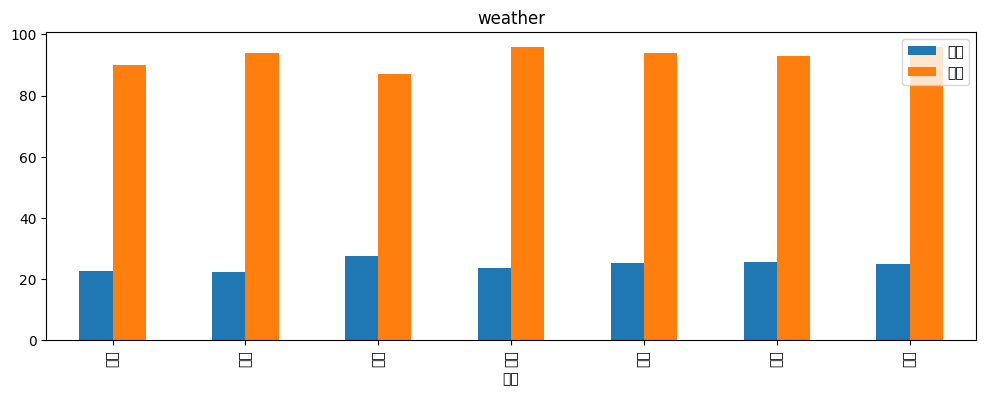

In [ ]:
# 스크래핑
import requests
# 크롤링
from bs4 import BeautifulSoup
# 데이터분석
import pandas
# 시각화
import matplotlib as mpl
import matplotlib.pyplot as plt

# 스크래핑
url = "https://www.weather.go.kr/w/observation/land/city-obs.do"
source = requests.get(url)

# 크롤링
soup = BeautifulSoup(source.content, 'html.parser')
table = soup.find('table',{'class':'table-col'})

# 크롤링한 데이터 저장
data =[]
for tr in table.find_all('tr'):
    ths = list(tr.find_all('th'))
    tds = list(tr.find_all('td'))
    for th in ths:
      if th.find("a"):
        point = th.find("a").string
        temp = tds[4].string
        humidity = tds[8].string
        data.append([point,temp,humidity])

data
with open("weather.csv","w",  encoding="utf-8") as f:
  f.write('지역,온도,습도\n')
  for l in data:
    f.write(f"{l[0]},{l[1]},{l[2]}\n")
#테이터 전처리
df = pandas.read_csv("weather.csv",  encoding='utf-8', index_col='지역')
df
city_df = df.loc[['서울','인천','대전','대구','광주','부산','울산']]
city_df

#시각화
#font_name = mpl.font_manager.FontProperties(fname="C:\Windows\Fonts\malgun.ttf").get_name()
#mpl.rc('font', family=font_name)
ax = city_df.plot(kind='bar', title='weather', figsize=(12,4))
plt.show()